![head.png](figures/head.jpg)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

In [70]:
# Packages used in this notebook
import numpy as np
from scipy import stats
from scipy import integrate
import matplotlib.pyplot as plt

# Probabilities

* Uncertainty about outcomes lies at the heart of many financial applications.
* Quantifying the uncertainty in terms of probabilities enables us to do fun stuff, such as:
  * pricing derivatives or
  * measuring risk.
* Working wit probabilites in Python usually calls for NumPy and or SciPy.

See:
* https://docs.scipy.org/doc/scipy/tutorial/general.html

## Random numbers (`np.random`)

NumPy is a popular Python library used for scientific computing and data analysis. One of its most commonly used modules is `np.random`, which provides various functions for generating random numbers and arrays.

The `np.random` module uses a pseudo-random number generator algorithm to generate random numbers. This algorithm uses a starting value, called a seed, to generate a sequence of apparently random numbers. The sequence of numbers generated by the algorithm is not truly random, but it has many of the properties of a random sequence and is considered random enough for most applications.

The seed value can be set manually using the `np.random.seed()` function, which ensures that the sequence of numbers generated by the algorithm is the same each time the program is run. If the seed value is not set explicitly, Python uses the current system time as the default seed value.

See:
* https://numpy.org/doc/1.16/reference/routines.random.html

In [71]:
np.random.seed(seed=88888)

# Generate a random number between 0 and 1
print(np.random.rand())

# Generate an array of 5 random numbers between 0 and 1
print(np.random.rand(5))

# Generate a 2x3 array of random numbers between 0 and 1
print(np.random.rand(2, 3))

0.6768935286567954
[0.64422194 0.30171651 0.08426662 0.87314486 0.5639797 ]
[[0.39218695 0.45871883 0.07102008]
 [0.22815498 0.6499258  0.99057528]]


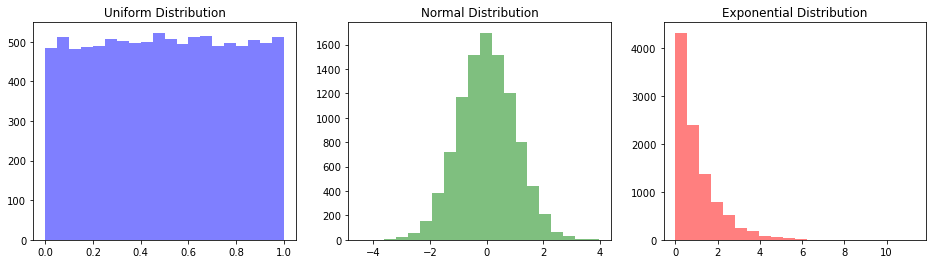

In [72]:
# Generate random numbers from a uniform distribution
uniform_nums = np.random.uniform(size=10000)

# Generate random numbers from a normal distribution
normal_nums = np.random.normal(loc=0, scale=1, size=10000)

# Generate random numbers from an exponential distribution
exponential_nums = np.random.exponential(scale=1, size=10000)

# Plot histograms of the three distributions
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].hist(uniform_nums, bins=20, color='blue', alpha=0.5)
axs[0].set_title('Uniform Distribution')
axs[1].hist(normal_nums, bins=20, color='green', alpha=0.5)
axs[1].set_title('Normal Distribution')
axs[2].hist(exponential_nums, bins=20, color='red', alpha=0.5)
axs[2].set_title('Exponential Distribution')
plt.show()

## Cholesky decomposition

[Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) is a matrix decomposition method that decomposes a symmetric and positive-definite matrix into the product of a lower-triangular matrix and its conjugate transpose. This method is named after the mathematician André Cholesky, who first described it in the early 1900s. The Cholesky decomposition method is particularly useful for solving systems of linear equations and for **generating correlated random numbers**. It is often faster and more numerically stable than other matrix decomposition methods, such as LU decomposition.

To perform Cholesky decomposition, we start with a symmetric and positive-definite matrix A. We then decompose $A$ into the product of a lower-triangular matrix $L$ and its conjugate transpose, $L^T$. That is, we find $L$ such that:

$$A = LL^T$$

To generate correlated random numbers using Cholesky decomposition, we simply multiply the lower-triangular matrix $L$ by the set of uncorrelated random variables. This results in a set of correlated random variables with the same mean and variance as the original uncorrelated random variables, but with a correlation structure defined by the Cholesky decomposition matrix. In Python we use `np.linalg.cholesky()` to perform a Cholesky decomposition on the correlation matrix, which results in a lower-triangular matrix that can be used to transform uncorrelated random numbers into correlated random numbers.

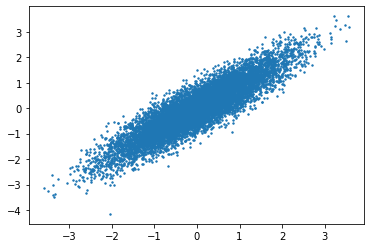

In [73]:
import numpy as np

# Define the correlation matrix
corr_matrix = np.array([[1.0, 0.9], [0.9, 1.0]])

# Perform Cholesky decomposition
cholesky_decomp = np.linalg.cholesky(corr_matrix)

# Generate uncorrelated random numbers
uncorrelated_nums = np.random.normal(size=(2, 10000))

# Transform the uncorrelated random numbers into correlated random numbers
corr_nums = np.dot(cholesky_decomp, uncorrelated_nums)

# Plot the correlated random numbers
import matplotlib.pyplot as plt
plt.scatter(corr_nums[0], corr_nums[1], s=2)
plt.show()

## Probability distributions (`scipy.stats`)

Scipy is a powerful Python library for scientific computing and data analysis that provides a wide range of tools and functions for mathematical optimization, integration, signal processing, and statistics. Within the Scipy library, the scipy.stats module provides a comprehensive set of statistical functions and tools for working with probability distributions and performing statistical tests.

Consider random variable $X \sim \mathcal{N}(\mu,\sigma^2)$ as an example for a continuous univariate distribution, i.e. the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), with:

Probability density function (PDF):
$$\phi(x) = \frac{d\Phi(x)}{dx} = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 }$$


Cumulative distribution function (CDF):
$$\Phi(x) = P(X \le x) = \int_{-\infty}^x \phi(u)\; du$$

Quantile function, i.e. inverse of the CDF:
$$\Phi^{-1}(p) = \inf \{x \in \mathbb{R}: p \le \Phi(x)\},\;\; p \in (0,1)$$

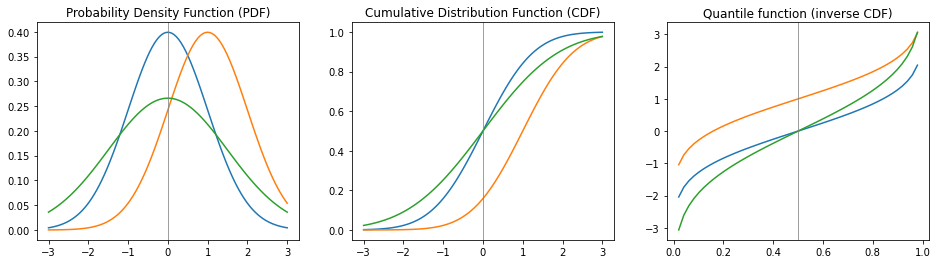

In [74]:
x = np.linspace(-3, 3, 100)
p = np.linspace(0, 1)
# Plot histograms of the three distributions
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].plot(x, stats.norm.pdf(x, 0, 1))
axs[0].plot(x, stats.norm.pdf(x, 1, 1))
axs[0].plot(x, stats.norm.pdf(x, 0, 1.5))
axs[0].axvline(x=0, color='grey', linewidth=.75)
axs[0].set_title('Probability Density Function (PDF)')
axs[1].plot(x, stats.norm.cdf(x, 0, 1))
axs[1].plot(x, stats.norm.cdf(x, 1, 1))
axs[1].plot(x, stats.norm.cdf(x, 0, 1.5))
axs[1].axvline(x=0, color='grey', linewidth=.75)
axs[1].set_title('Cumulative Distribution Function (CDF)')
axs[2].plot(p, stats.norm.ppf(p, 0, 1))
axs[2].plot(p, stats.norm.ppf(p, 1, 1))
axs[2].plot(p, stats.norm.ppf(p, 0, 1.5))
axs[2].axvline(x=0.5, color='grey', linewidth=.75)
axs[2].set_title('Quantile function (inverse CDF)')
plt.show()

## Numerical integration (`scipy.integrate`)

Numerical integration, also known as numerical quadrature, is a method for approximating the integral of a function using numerical techniques. The Scipy library provides a number of functions for numerical integration in `scipy.integrate`.

In [75]:
# read on the use of lambda here: https://docs.python.org/3/reference/expressions.html#lambda
result, error = integrate.quad(lambda x: stats.norm.pdf(x, 0, 1), -np.inf, +np.inf)
print(f"{result:.4f}")

result, error = integrate.quad(lambda x: stats.norm.pdf(x, 0, 1), -np.inf, 1.96)
print(f"{result:.4f}")

print(f"{stats.norm.cdf(1.96, 0, 1):.4f}")

1.0000
0.9750
0.9750


As an additiona example, we estimate the integral 

$$
\int_0^1 (2\sin(15 x) + 15 x)\, d x.
$$

The solution, calculated analytically, is $\displaystyle\frac{1}{30} \left(229-4 \cos(15)\right)=7.7346$. We will pick up this example again in the Monte Carlo section.

The integral of f(x) from 0 to 1 is: 7.7346


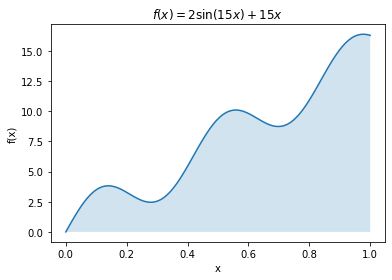

In [76]:
def f(x):
    return 2 * np.sin(15*x) + 15*x

# Compute the definite integral of f(x) from 0 to 1
result, error = integrate.quad(f, 0, 1)
print(f"The integral of f(x) from 0 to 1 is: {result:,.4f}")

# Plot the function f(x)
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = 2 \sin(15 x) + 15 x$')
plt.show()

# Stochastic processes

## Markov property

In probability theory and statistics, the term Markov property refers to the memorylessness of a stochastic process. It states that given the present state of the process, the future states of the process are independent of the past states of the process. More formally, a stochastic process has the Markov property if the conditional probability distribution of future states given the present state depends only on the present state and not on any past states. Markov property is consistent with the **weak form of [market efficiency](https://en.wikipedia.org/wiki/Efficient-market_hypothesis)!**

## Generalized Wiener process
A stochastic process $X$, with drift $\mu$ and dispersion $\sigma$, follows a generalized Wiener process if it satisfies the following stochastic differential equation (SDE)

$$dX_t = \mu \times dt + \sigma \times dW_t$$

Note that by definition, the increments of a wiener process $W_t = W_t - W_0 \sim \mathcal{N}(0,t)$, i.e. are normally distributed, centered at zero.

For an arbitrary initial value $X_0$ 

$$X_t = X_0 + \mu \times t + \sigma \times z \times \sqrt{t}$$

, where $z \sim \mathcal{N}(0,1)$.

## Geometric Brownian motion

A stochastic process $S$ follows a Geometric Brownian Motion (GBM) if it satisfies the following stochastic differential equation (SDE)

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

where $W_t = W_t - W_0 \sim \mathcal{N}(0,t)$, i.e. a Wiener process, hence, normally distributed increments.

For an arbitrary initial value $S_0$, the above SDE has the following analytical solution (under Ito's interpretation)

$$S_t = S_0 \exp\left( \left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t \right)$$

, hence,

$$\ln \frac{S_t}{S_0} = \left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t$$

Note that $W_t = z \sqrt{t}$, where $z \sim \mathcal{N}(0,1)$. Therefore, $\ln \frac{S_t}{S_0}$ (log-return) is normally and $S_t$ is log-normally distributed.

In [77]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#%% Create stock process:
# Random numbers N(0,1)
np.random.seed(888)
Z = np.random.normal(0, 1, 250)
def plot_gbm(mu, sigma):
    # returns for our geometric brownian motion
    R = Z * sigma * np.sqrt(1/250) + (mu-0.5*sigma**2) * 1/250
    # stock process (insert 100 for t=0)
    S = np.insert(100*np.exp(np.cumsum(R)), 0, 100)
    # Plotting
    plt.figure('GBM process', figsize=(9,4))
    plt.title(f"GBM ($\mu$ = {mu}, $\sigma$ = {sigma})")
    plt.axhline(y = 100, color ="black", linestyle ="--", linewidth=1)
    plt.plot(S)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.ylim(30, 170)
    plt.show()

interact(plot_gbm, 
         mu = widgets.FloatSlider(value=0.1, min=-0.5, max=0.5, step=0.05),
         sigma = widgets.FloatSlider(value=0.25, min=0, max=0.9, step=0.05),
        )

interactive(children=(FloatSlider(value=0.1, description='mu', max=0.5, min=-0.5, step=0.05), FloatSlider(valu…

<function __main__.plot_gbm(mu, sigma)>

# Monte Carlo simulation

[Monte Carlo simulation](https://de.wikipedia.org/wiki/Monte-Carlo-Simulation) is a computational technique that uses statistical sampling to estimate the behavior of complex systems or processes. It was first developed by scientists working on the Manhattan Project in the 1940s to solve problems related to nuclear weapons research. More specifically, Monte Carlo simulation refers to the simulation of (independent) samples of a random variable $Z$ using computer-generated random numbers. Once sufficiently many random numbers have been drawn, these can be used to produce an **estimate** of some quantity that depends on the distribution of $Z$. The quality of an estimate can be quantified by a **confidence interval** around the estimate. (For a comprehensive source, see: Paul Glasserman.  *Monte Carlo Methods in Financial Engineering*. Springer, 2004.)


Consider the problem of estimating the integral of a function $f$ over the unit interval:

$$
\alpha = \int_0^1 f(x)\, d x. 
$$


We may write
$$
\alpha=\mathbb E[f(U)], 
$$
with $U$ uniformly distributed between $0$ and $1$. Drawing points $u_1,u_2,\ldots, u_n$ independently and uniformly from $[0,1]$, the Monte Carlo estimate is given by

$$
\hat\alpha_n = \frac{1}{n} \sum_{i=1}^n f(u_i). 
$$

If $f$ is integrable over $[0,1]$ then, by the **strong law of large numbers**,
$$
\hat \alpha_n\rightarrow \alpha \text{ with probability } 1, \text{ as } n\rightarrow\infty. 
$$

If $f$ is square integrable, and setting,
$$
\sigma_f^2 = \int_0^1 (f(x)-\alpha)^2\, d x,
$$
then, by the **central limit theorem**, the error $\hat\alpha_n-\alpha$ is approximately normally distributed with mean $0$ and standard deviation $\sigma_f/\sqrt{n}$.

$\sigma_f$ is typically unknown, but can be estimated by the  sample standard deviation 
$$
s_f = \sqrt{\frac{1}{n-1} \sum_{i=1}^n (f(u_i)-\hat\alpha_n)^2}. 
$$

Thus, an (asymptotically) valid $1-\delta$ confidence interval for $\alpha$ is given by
$$
\left[\hat\alpha_n- \mathrm{N}_{1-\delta/2} \frac{s_f}{\sqrt{n}}\,\,,\,\, \hat\alpha_n+ \mathrm{N}_{1-\delta/2} \frac{s_f}{\sqrt{n}}\right],
$$
where $\mathrm{N}_{1-\delta/2}$ denotes the $1-\delta/2$ quantile of the standard normal distribution. For example, for $1-\delta=0.95$: $\mathrm{N}_{1-\delta/2} =  \mathrm{N}_{0.975} \approx 1.96$. 

Thus, from the function value $f(u_1), \ldots, f(u_n)$ we obtain
* an estimate of the integral $\alpha$,
* and a measure of the error of the estimate.

The form of the standard error $\sigma_f/\sqrt{n}$ implies:
* to cut the error in half requires increasing the sample size by four;
* adding one decimal point of precision requires $100$ times as many points. 

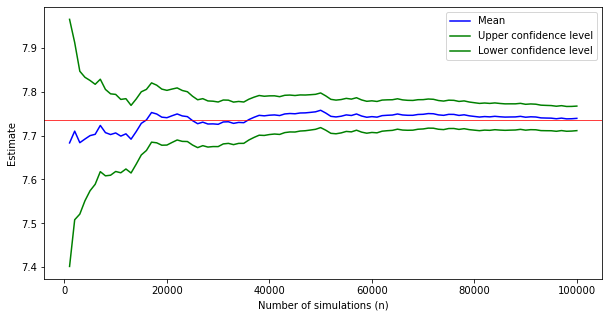

In [82]:
# Generate random numbers, ...
n = 100000
np.random.seed(123)
z = np.random.uniform(0, 1, n)
# .. and calculate values for f(x)
y = f(z)

# Show estimate for different numbers of simulations (n)
y_m = []
y_cfl = []
y_cfu = []
for i in range(1000, n+1, 1000):
    y_m.append(np.mean(y[:i]))
    y_cfl.append(np.mean(y[:i] - 1.96 * np.std(y[:i])/np.sqrt(i)))    
    y_cfu.append(np.mean(y[:i] + 1.96 * np.std(y[:i])/np.sqrt(i)))

plt.figure(figsize=(10,5))
plt.plot(range(1000,n+1,1000), y_m, color='blue', label='Mean')
plt.plot(range(1000,n+1,1000), y_cfu, color='green', label='Upper confidence level')
plt.plot(range(1000,n+1,1000), y_cfl, color='green', label='Lower confidence level')
plt.axhline(y=7.7346, color='red', linewidth=.75)
plt.xlabel('Number of simulations (n)')
plt.ylabel('Estimate')
plt.legend(loc='upper right')
plt.show()